In [1]:
import numpy as np

In [2]:
input_size = 3 # number of features
layers = [4,3] # NUmber of neurons in the first and the second layer
output_size = 2

# Defining a Neural Network 

In [3]:
# Defining softmax helper function
def softmax(a):
    """Softmax is a function that does e^a(i)/sum(e^a(i)) , suppose a=[1,2,3] then its softmax would be e^1/(e^1+e^2+e^3) , 
    e^2/(e^1+e^2+e^3), e^3/(e^1+e^2+e^3). Here we can see that the sum is going to be 1 for all the values that we have we have 
    calculated so far.
    """
    e_pa = np.exp(a) # numpy does broadcasting for a vector so e_pa is a vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) # axis is 0 for colums which is by default and axis 1 is for rows. Keepdims explained below
    return ans

a = np.array([[10,10],[20,20]])
a_ = softmax(a)
print(a_)

[[0.5 0.5]
 [0.5 0.5]]


In [4]:
a = np.array([[1,2,3],[6,5,4]])
print(np.sum(a)) # This would give us the sum of all the elements in the 2d vector.
print(np.sum(a,axis=0)) # Sum of all the columns
print(np.sum(a,axis=1)) # Sum of all the elements along the row
# Now keepdims just preservs the shape of the array
print(np.sum(a,axis=0,keepdims=True)) # This would return thr sum along the columns in a 2d vector

21
[7 7 7]
[ 6 15]
[[7 7 7]]


In [5]:
weg = np.random.randn(input_size,layers[0])
print(weg)

[[-2.49928224 -0.21081326  0.31509969  1.32764518]
 [ 1.9698653  -0.67092532  0.30287951  1.77689566]
 [-2.19650974  0.49555483 -0.63763174  0.96615081]]


In [58]:
class NeuralNetwork():
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {}
        
        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0]) #this would generate a normal distribution.
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1]) 
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer/Output layer
        model['W3'] = np.random.randn(layers[1],output_size) 
        model['b3'] = np.zeros((1,output_size))
        
        self.model=model
        
        
    # Defining forward propagation
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1) # tanh is a function like sigmoid as it converts any input in range -1 to 1, sigmoid does in range 0 and 1
        
        z2 = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        self.activation_output = (a1,a2,y_)
        return y_
        
        
    # Defining Back propagation - one of the toughest topics to understand in deep learning
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_output
        
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3) # its derivative of W
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        # Update the model parameters using gradient descent
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3

        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_output
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("y_ ",y_.shape)

In [59]:
def loss(y_out,p):
    l = -np.mean(y_out*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [60]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [61]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=1,factor=0.8)

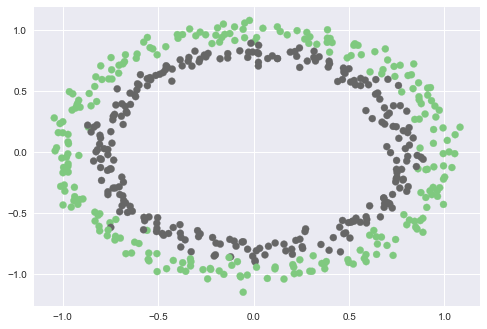

In [62]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [63]:
print(Y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [64]:
y_onehot = one_hot(Y,3)
print(y_onehot)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Training our Model

In [65]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [66]:
forward = model.forward(X)
print(forward.shape)

(500, 2)


In [67]:
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
y_  (500, 2)


In [68]:
def train(X,Y,model,epochs,learning_rate,logs=True):   # Logs tell wheather to print epoch and loss or not
    
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [69]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3584
Epoch 1 Loss 0.3486
Epoch 2 Loss 0.3480
Epoch 3 Loss 0.3478
Epoch 4 Loss 0.3476
Epoch 5 Loss 0.3475
Epoch 6 Loss 0.3474
Epoch 7 Loss 0.3473
Epoch 8 Loss 0.3472
Epoch 9 Loss 0.3472
Epoch 10 Loss 0.3471
Epoch 11 Loss 0.3471
Epoch 12 Loss 0.3470
Epoch 13 Loss 0.3470
Epoch 14 Loss 0.3469
Epoch 15 Loss 0.3469
Epoch 16 Loss 0.3469
Epoch 17 Loss 0.3469
Epoch 18 Loss 0.3468
Epoch 19 Loss 0.3468
Epoch 20 Loss 0.3468
Epoch 21 Loss 0.3468
Epoch 22 Loss 0.3467
Epoch 23 Loss 0.3467
Epoch 24 Loss 0.3467
Epoch 25 Loss 0.3467
Epoch 26 Loss 0.3467
Epoch 27 Loss 0.3466
Epoch 28 Loss 0.3466
Epoch 29 Loss 0.3466
Epoch 30 Loss 0.3466
Epoch 31 Loss 0.3466
Epoch 32 Loss 0.3466
Epoch 33 Loss 0.3465
Epoch 34 Loss 0.3465
Epoch 35 Loss 0.3465
Epoch 36 Loss 0.3465
Epoch 37 Loss 0.3465
Epoch 38 Loss 0.3465
Epoch 39 Loss 0.3464
Epoch 40 Loss 0.3464
Epoch 41 Loss 0.3464
Epoch 42 Loss 0.3464
Epoch 43 Loss 0.3464
Epoch 44 Loss 0.3464
Epoch 45 Loss 0.3464
Epoch 46 Loss 0.3463
Epoch 47 Loss 0.3463
Ep

Epoch 436 Loss 0.3418
Epoch 437 Loss 0.3417
Epoch 438 Loss 0.3417
Epoch 439 Loss 0.3417
Epoch 440 Loss 0.3417
Epoch 441 Loss 0.3417
Epoch 442 Loss 0.3416
Epoch 443 Loss 0.3416
Epoch 444 Loss 0.3416
Epoch 445 Loss 0.3416
Epoch 446 Loss 0.3416
Epoch 447 Loss 0.3415
Epoch 448 Loss 0.3415
Epoch 449 Loss 0.3415
Epoch 450 Loss 0.3415
Epoch 451 Loss 0.3415
Epoch 452 Loss 0.3414
Epoch 453 Loss 0.3414
Epoch 454 Loss 0.3414
Epoch 455 Loss 0.3414
Epoch 456 Loss 0.3413
Epoch 457 Loss 0.3413
Epoch 458 Loss 0.3413
Epoch 459 Loss 0.3413
Epoch 460 Loss 0.3413
Epoch 461 Loss 0.3412
Epoch 462 Loss 0.3412
Epoch 463 Loss 0.3412
Epoch 464 Loss 0.3412
Epoch 465 Loss 0.3412
Epoch 466 Loss 0.3411
Epoch 467 Loss 0.3411
Epoch 468 Loss 0.3411
Epoch 469 Loss 0.3411
Epoch 470 Loss 0.3411
Epoch 471 Loss 0.3410
Epoch 472 Loss 0.3410
Epoch 473 Loss 0.3410
Epoch 474 Loss 0.3410
Epoch 475 Loss 0.3409
Epoch 476 Loss 0.3409
Epoch 477 Loss 0.3409
Epoch 478 Loss 0.3409
Epoch 479 Loss 0.3409
Epoch 480 Loss 0.3408
Epoch 481 

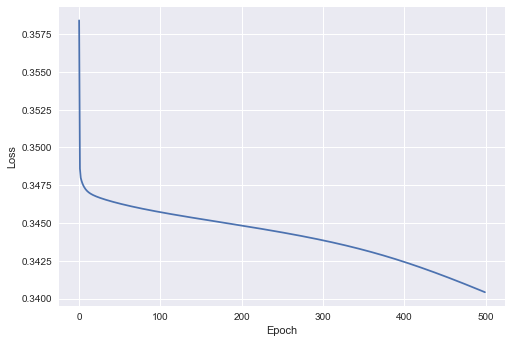

In [72]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()